In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn.preprocessing as sp
import sklearn.preprocessing as pp

from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_excel('redwine.xlsx')
display(df.columns)
display(df.tail())
display(df.head())
display(df.shape)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

In [4]:
ss=pp.StandardScaler()
onehot=pp.OneHotEncoder()

In [5]:
Y = (df.loc[:,'quality'])
X = (df.iloc[:,:-1])

new_y=Y.copy()
new_y

new_y=new_y.replace(to_replace=[[3,4],[5,6],[7,8]], value=["bad","okay","fine"],regex=True)
new_y

0       okay
1       okay
2       okay
3       okay
4       okay
        ... 
1594    okay
1595    okay
1596    okay
1597    okay
1598    okay
Name: quality, Length: 1599, dtype: object

In [6]:

transform_x=make_column_transformer((ss,list(X.columns)))


In [7]:
processed_y=onehot.fit_transform(np.c_[new_y]).toarray()

In [8]:
processed_x=transform_x.fit_transform(X)


In [9]:
processed_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [10]:
processed_x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [11]:
display(processed_x.shape)
processed_y.shape

(1599, 11)

(1599, 3)

In [12]:
train_x, test_x, train_y, test_y = train_test_split(processed_x,processed_y, test_size=0.3, random_state=42)


In [20]:
model=models.Sequential()
model.add(layers.Dense(500, input_dim=11,activation='leaky_relu'))
model.add(layers.Dense(450, activation='leaky_relu'))
model.add(layers.Dense(350, activation='leaky_relu'))
model.add(layers.Dense(250, activation='leaky_relu'))
model.add(layers.Dense(150, activation='leaky_relu'))
model.add(layers.Dense(100, activation='leaky_relu'))
model.add(layers.Dense(50, activation='leaky_relu'))
model.add(layers.Dense(3, activation='softmax')) #last layer (output with 3 categroies)
type(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 500)               6000      
                                                                 
 dense_33 (Dense)            (None, 450)               225450    
                                                                 
 dense_34 (Dense)            (None, 350)               157850    
                                                                 
 dense_35 (Dense)            (None, 250)               87750     
                                                                 
 dense_36 (Dense)            (None, 150)               37650     
                                                                 
 dense_37 (Dense)            (None, 100)               15100     
                                                                 
 dense_38 (Dense)            (None, 50)               

NoneType

In [21]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [24]:
 model.fit(train_x,train_y,validation_split=0.5,epochs=150, )


Epoch 1/150
18/18 [==============================] - 0s 28ms/step - loss: 0.1331 - accuracy: 0.9463 - val_loss: 0.4108 - val_accuracy: 0.8732
Epoch 2/150
18/18 [==============================] - 0s 16ms/step - loss: 0.0975 - accuracy: 0.9642 - val_loss: 0.2876 - val_accuracy: 0.9214
Epoch 3/150
18/18 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.9946 - val_loss: 0.2795 - val_accuracy: 0.9321
Epoch 4/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.9946 - val_loss: 0.2625 - val_accuracy: 0.9375
Epoch 5/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0285 - accuracy: 0.9928 - val_loss: 0.2908 - val_accuracy: 0.9375
Epoch 6/150
18/18 [==============================] - 0s 15ms/step - loss: 0.0292 - accuracy: 0.9946 - val_loss: 0.3032 - val_accuracy: 0.9304
Epoch 7/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0257 - accuracy: 0.9982 - val_loss: 0.2795 - val_accuracy: 0.9357
Epoch 

18/18 [==============================] - 0s 14ms/step - loss: 0.0162 - accuracy: 0.9964 - val_loss: 0.3228 - val_accuracy: 0.9339
Epoch 59/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0112 - accuracy: 0.9982 - val_loss: 0.3249 - val_accuracy: 0.9339
Epoch 60/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 0.3590 - val_accuracy: 0.9232
Epoch 61/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0144 - accuracy: 0.9946 - val_loss: 0.3742 - val_accuracy: 0.9196
Epoch 62/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.3183 - val_accuracy: 0.9357
Epoch 63/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.3277 - val_accuracy: 0.9321
Epoch 64/150
18/18 [==============================] - 0s 14ms/step - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.3308 - val_accuracy: 0.9304
Epoch 65/150

18/18 [==============================] - 0s 18ms/step - loss: 0.0074 - accuracy: 0.9964 - val_loss: 0.3731 - val_accuracy: 0.9196
Epoch 116/150
18/18 [==============================] - 0s 14ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.3625 - val_accuracy: 0.9250
Epoch 117/150
18/18 [==============================] - 0s 16ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.4179 - val_accuracy: 0.9036
Epoch 118/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0121 - accuracy: 0.9946 - val_loss: 0.4126 - val_accuracy: 0.9054
Epoch 119/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.3648 - val_accuracy: 0.9232
Epoch 120/150
18/18 [==============================] - 0s 12ms/step - loss: 0.0094 - accuracy: 0.9964 - val_loss: 0.3671 - val_accuracy: 0.9250
Epoch 121/150
18/18 [==============================] - 0s 13ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.4247 - val_accuracy: 0.9125
Epoch 

In [25]:
y_pred = model.predict(test_x)  


15/15 [==============================] - 0s 4ms/step


In [26]:
onehot.inverse_transform(y_pred)

array([['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['bad'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['fine'],
       ['fine'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay'],
       ['okay']

In [27]:
cm = confusion_matrix(onehot.inverse_transform(test_y), onehot.inverse_transform(y_pred))


In [28]:
int(cm.trace()/cm.sum()*100)

84

In [29]:
cm

array([[  2,   1,  15],
       [  0,  48,  19],
       [  7,  34, 354]], dtype=int64)

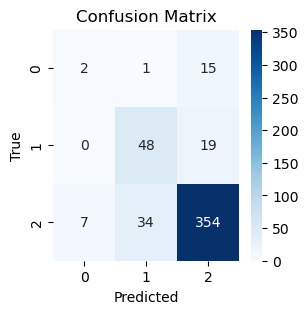

In [42]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()